1 Partie

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
# Question 1
# Read the datatset
mydata = pd.read_csv('wine-quality-white-and-red.csv')

In [5]:
# Question 2
df = mydata.copy()

In [ ]:
# Question 3
df.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
# Question 4
df['quality']

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [27]:
# Question 5
df.loc[1, 'quality']

np.float64(6.0)

In [29]:
# Question 6
red_wines = df[df['type'] == 'red']
white_wines = df[df['type'] == 'white']

In [ ]:
# Question 7
# Cite les données catégoriques du dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

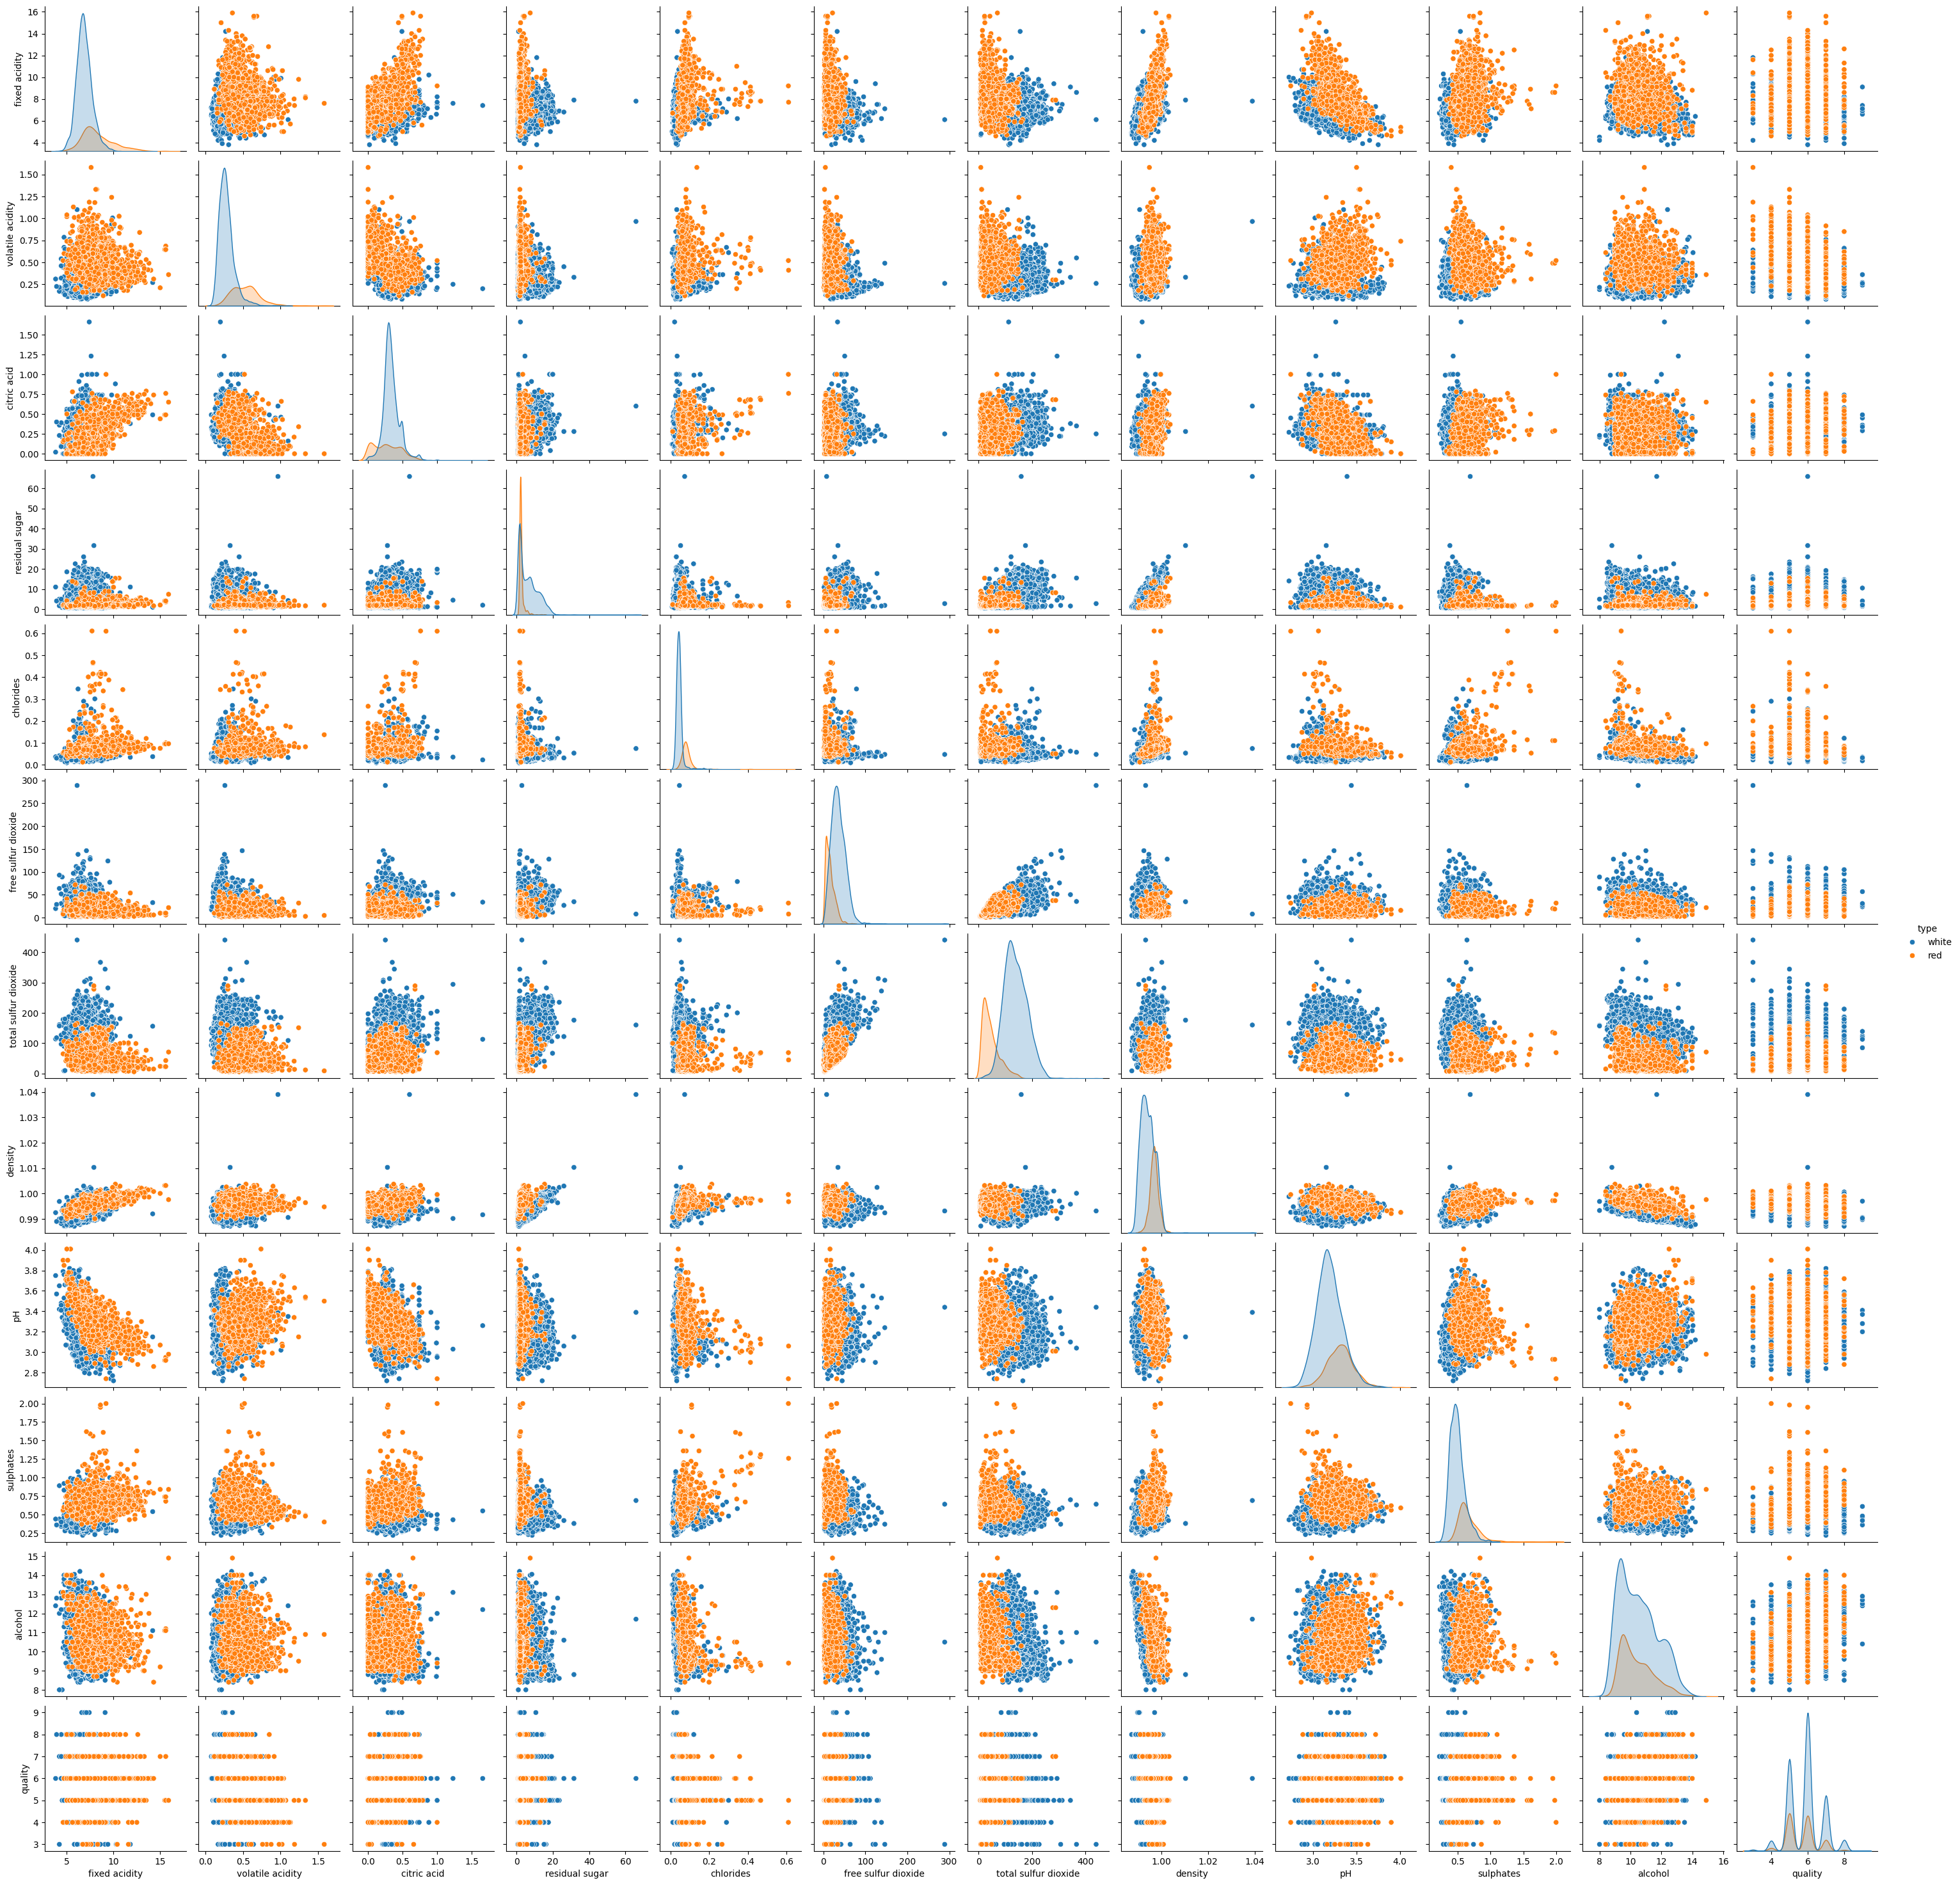

In [12]:
# Question 8
import seaborn as sns
sns.pairplot(df, hue='type')

On peut voir si les vins rouges et blancs se regroupent différemment dans l'espace défini par deux variables, ce qui pourrait indiquer des caractéristiques distinctives.

Attention : Les points éloignés du reste des données peuvent indiquer des valeurs atypiques ou des erreurs.

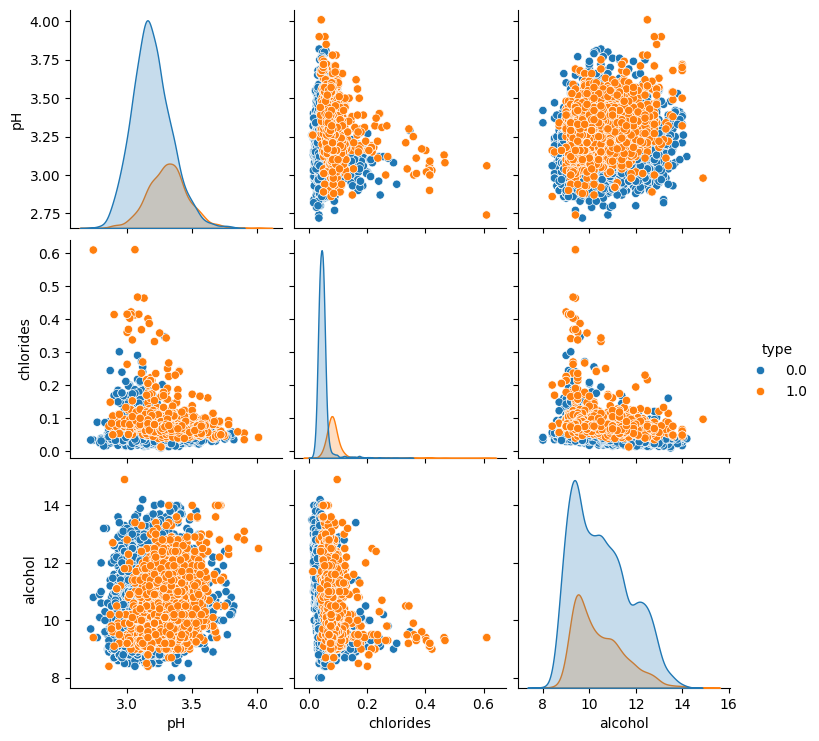

In [ ]:
sns.pairplot(df[['pH', 'chlorides', 'alcohol', 'type']], hue='type')

# Le DataFrame contient beaucoup de colonnes,
# Le graphique sera donc dense. On peut restreindre l’analyse à un sous-ensemble de colonnes :

<Axes: xlabel='chlorides', ylabel='pH'>

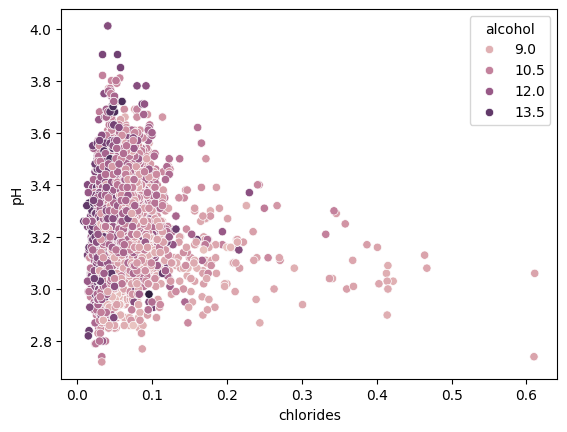

In [ ]:
# Question 9
# pH en fonction des chlorides, coloré par alcool
sns.scatterplot(data=df, x='chlorides', y='pH', hue='alcohol')

<Axes: xlabel='quality', ylabel='count'>

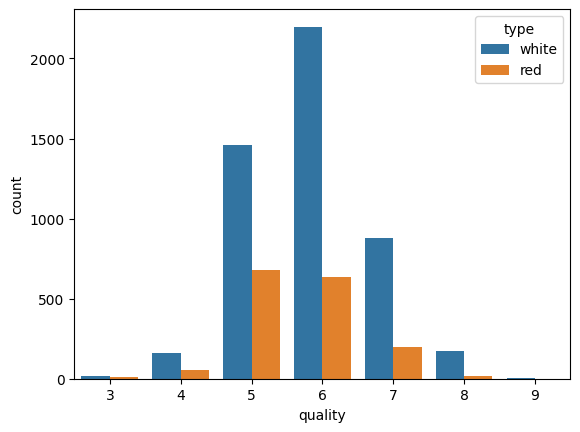

In [14]:
# Question 10
sns.countplot(data=df, x='quality', hue='type')

<Axes: xlabel='type', ylabel='alcohol'>

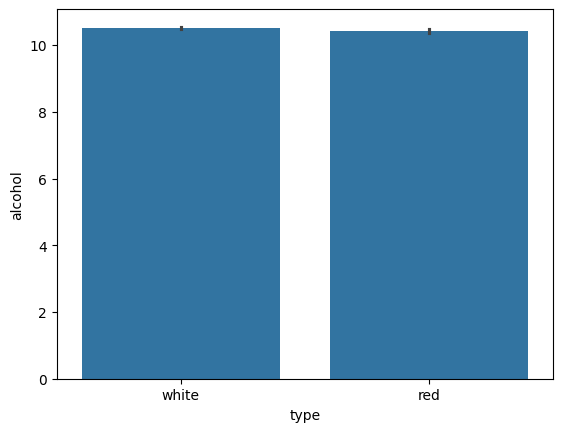

In [ ]:
# Question 11
# Exemple : comparer l'alcool moyen par type de vin.
sns.barplot(data=df, x='type', y='alcohol')

In [17]:
# Question 12
# Depreciated version --> df['type'] = df['type'].replace({'red': 1, 'white': 0})
df['type'] = df['type'].replace({'red': 1, 'white': 0}).astype(int)


2 Partie

In [22]:
# Question 1
import numpy as np

# Remplacer aléatoirement 10 valeurs par NaN
nan_indices = [(np.random.randint(0, df.shape[0]), np.random.randint(0, df.shape[1])) for _ in range(10)]
for row, col in nan_indices:
    df.iat[row, col] = np.nan


In [46]:
# Question 2
# Pour visualiser les valeurs manquantes, la heatmap de seaborn est très utile
import seaborn as sns
import matplotlib.pyplot as plt

# On vérifie s'il y a des valeurs manquantes
print(df.isna().sum())


fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)
plt.show()


type                    2
fixed acidity           3
volatile acidity        1
citric acid             0
residual sugar          2
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      4
sulphates               1
alcohol                 1
quality                 2
dtype: int64


In [63]:
# Question 3
# Pour supprimer les lignes où il y a au moins une valeur manquante, utilisez dropna.

df.dropna()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0.0            7.0             0.270         0.36            20.7   
1      0.0            6.3             0.300         0.34             1.6   
2      0.0            8.1             0.280         0.40             6.9   
3      0.0            7.2             0.230         0.32             8.5   
4      0.0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492   1.0            6.2             0.600         0.08             2.0   
6493   1.0            5.9             0.550         0.10             2.2   
6494   1.0            6.3             0.510         0.13             2.3   
6495   1.0            5.9             0.645         0.12             2.0   
6496   1.0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8      6.0  
1          0.49      9.5      6.0  
2          0.44     10.1      6.0  
3          0.40      9.9      6.0  
4          0.40      9.9      6.0  
...         ...      ...      ...  
6492       0.58     10.5      5.0  
6493       0.76     11.2      6.0  
6494       0.75     11.0      6.0  
6495       0.71     10.2      5.0  
6496       0.66     11.0      6.0  

[6477 rows x 13 columns]

In [78]:
# Question 4
# Cette ligne supprime les lignes seulement si toutes les valeurs sont NaN

df.dropna(how='all')
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0.0            7.0              0.27         0.36            20.7   
1   0.0            6.3              0.30         0.34             1.6   
2   0.0            8.1              0.28         0.40             6.9   
3   0.0            7.2              0.23         0.32             8.5   
4   0.0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8      6.0  
1       0.49      9.5      6.0  
2       0.44     10.1      6.0  
3       0.40      9.9      6.0  
4       0.40      9.9      6.0

In [85]:
# Question 2
# Pour visualiser les valeurs manquantes, la heatmap de seaborn est très utile

# On vérifie s'il y a des valeurs manquantes
df_2 = df.dropna()
print(df_2.isna().sum())

fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(df_2.isna().transpose(), cbar=False, ax=ax)
plt.show()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [86]:
# Question 5
# On affiche les nouvelles valeurs par interpolation
df_interpolated = df.interpolate()
print(df_interpolated)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0.0            7.0             0.270         0.36            20.7   
1      0.0            6.3             0.300         0.34             1.6   
2      0.0            8.1             0.280         0.40             6.9   
3      0.0            7.2             0.230         0.32             8.5   
4      0.0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492   1.0            6.2             0.600         0.08             2.0   
6493   1.0            5.9             0.550         0.10             2.2   
6494   1.0            6.3             0.510         0.13             2.3   
6495   1.0            5.9             0.645         0.12             2.0   
6496   1.0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [87]:
# L'interpolation par défaut est linéaire.
# On peut utiliser d'autres méthodes d'interpolation, on peut spécifier la méthode comme ceci :
df_interpolated_2 = df.interpolate(method='polynomial', order=5)
print(df_interpolated_2)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0.0            7.0             0.270         0.36            20.7   
1      0.0            6.3             0.300         0.34             1.6   
2      0.0            8.1             0.280         0.40             6.9   
3      0.0            7.2             0.230         0.32             8.5   
4      0.0            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492   1.0            6.2             0.600         0.08             2.0   
6493   1.0            5.9             0.550         0.10             2.2   
6494   1.0            6.3             0.510         0.13             2.3   
6495   1.0            5.9             0.645         0.12             2.0   
6496   1.0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

3 Partie

In [110]:
# Question 1

my_data_2 = pd.read_csv('wine-quality-white-and-red.csv')
df_2 = my_data_2.copy()

mean_ph_red = df_2[df_2['type'] == 'red']['pH'].mean()
std_ph_red = df_2[df_2['type'] == 'red']['pH'].std()

mean_ph_white = df_2[df_2['type'] == 'white']['pH'].mean()
std_ph_white = df_2[df_2['type'] == 'white']['pH'].std()

print("Moyenne et écart-type du pH des vins rouges :")
print(f"Moyenne : {mean_ph_red}, Écart-type : {std_ph_red}")

print("Moyenne et écart-type du pH des vins blancs :")
print(f"Moyenne : {mean_ph_white}, Écart-type : {std_ph_white}")

Moyenne et écart-type du pH des vins rouges :
Moyenne : 3.3111131957473416, Écart-type : 0.15438646490354277
Moyenne et écart-type du pH des vins blancs :
Moyenne : 3.1882666394446715, Écart-type : 0.1510005996150668


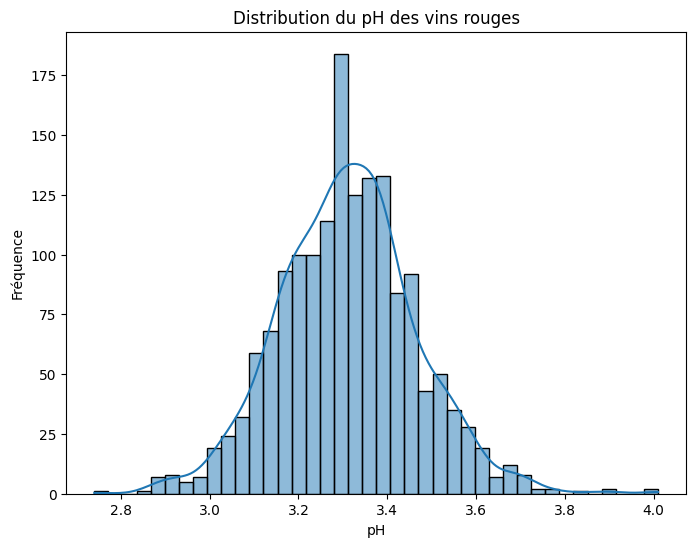

In [111]:
# Question 2
red_wine = df_2[df_2['type'] == 'red']

plt.figure(figsize=(8, 6))
sns.histplot(red_wine['pH'], kde=True)
plt.title('Distribution du pH des vins rouges')
plt.xlabel('pH')
plt.ylabel('Fréquence')
plt.show()

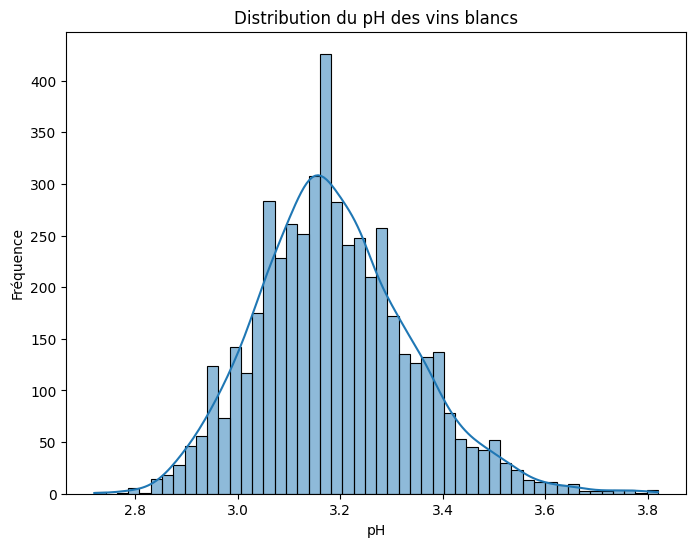

In [116]:
# Question 3
white_wine = df_2[df_2['type'] == 'white']

plt.figure(figsize=(8, 6))
sns.histplot(white_wine['pH'], kde=True)
plt.title('Distribution du pH des vins blancs')
plt.xlabel('pH')
plt.ylabel('Fréquence')
plt.show()

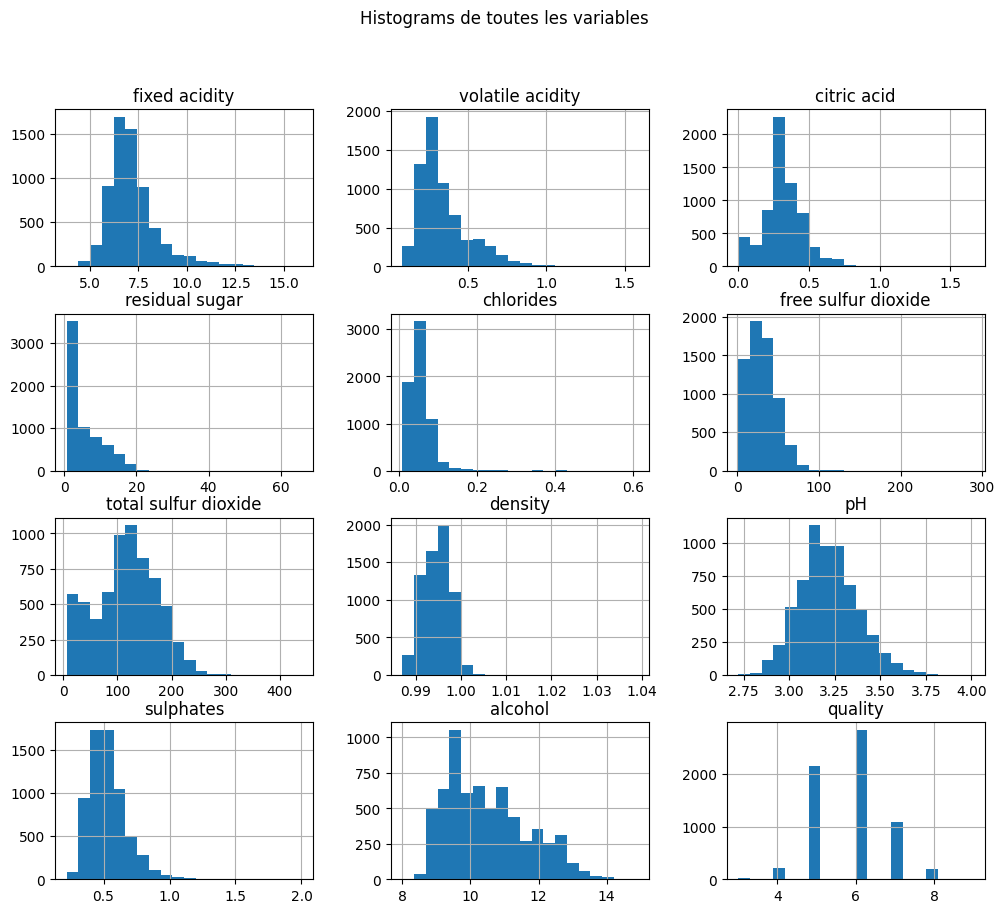

In [118]:
# Question 4
# Afficher l'histogramme pour toutes les variables
df_2.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms de toutes les variables')
plt.show()


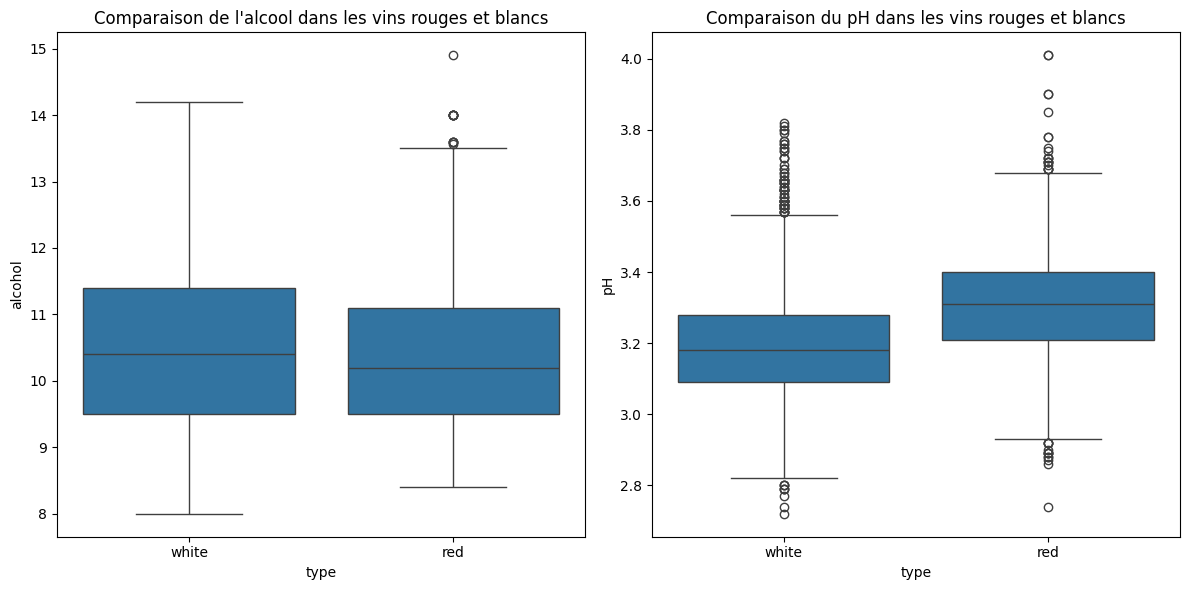

In [135]:
# Question 5 et 6
# Compare la répartition de 'alcohol' et 'pH' entre vins rouges et blancs
plt.figure(figsize=(12, 6))

# Boxplot pour l'alcool
plt.subplot(1, 2, 1)
sns.boxplot(x='type', y='alcohol', data=df_2)
plt.title('Comparaison de l\'alcool dans les vins rouges et blancs')

# Boxplot pour le pH
plt.subplot(1, 2, 2)
sns.boxplot(x='type', y='pH', data=df_2)
plt.title('Comparaison du pH dans les vins rouges et blancs')


plt.tight_layout()
plt.show()


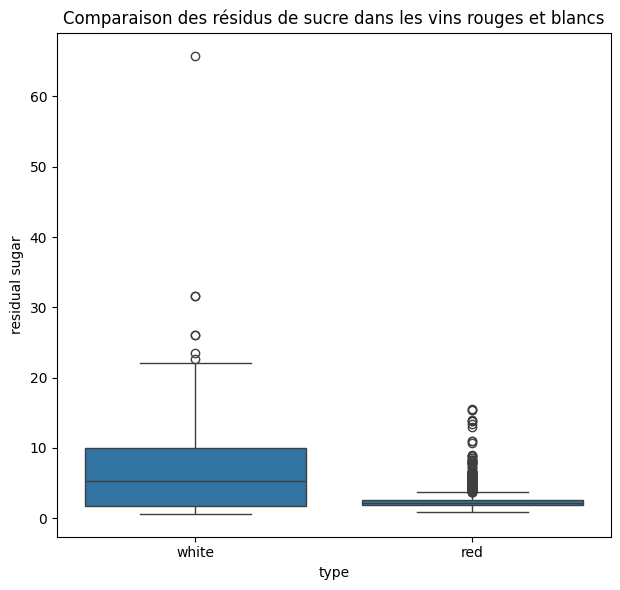

In [ ]:
# Question 5 et 6
# Compare la répartition de 'residual sugar' entre vins rouges et blancs
plt.figure(figsize=(12, 6))

# Boxplot pour le "residual sugar"
plt.subplot(1, 2, 2)
sns.boxplot(x='type', y='residual sugar', data=df_2)
plt.title('Comparaison des résidus de sucre dans les vins rouges et blancs')

plt.tight_layout()
plt.show()

In [ ]:
# Question 7
# Quartiles et médiane pour le taux d'alcool dans les vins rouges (voir Question 5 et 6 pour visualiser graphiquement)
red_alcohol_quartiles = red_wine['alcohol'].quantile([0.25, 0.5, 0.75])
print("Quartiles et médiane des vins rouges (alcool):\n", red_alcohol_quartiles, "\n")

# Quartiles et médiane pour le taux d'alcool dans les vins blancs
white_alcohol_quartiles = white_wine['alcohol'].quantile([0.25, 0.5, 0.75])
print("Quartiles et médiane des vins blancs (alcool):\n", white_alcohol_quartiles)


Quartiles et médiane des vins rouges (alcool):
 0.25     9.5
0.50    10.2
0.75    11.1
Name: alcohol, dtype: float64 

Quartiles et médiane des vins blancs (alcool):
 0.25     9.5
0.50    10.4
0.75    11.4
Name: alcohol, dtype: float64


Poids des groupes (vins rouges et blancs):
 type
white    4898
red      1599
Name: count, dtype: int64 



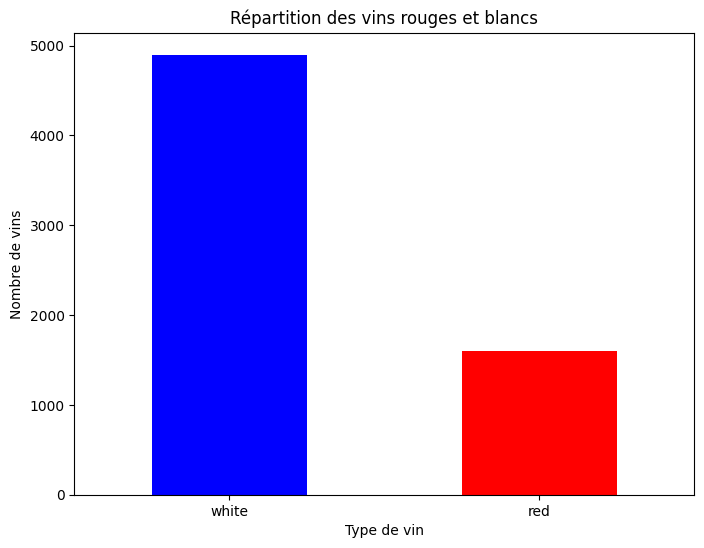

In [141]:
# Question 8
# Nombre de vins rouges et blancs + histogramme de répartition

# Obtention le nombre de vins rouges et blancs dans le dataset :
groupe_counts = df_2['type'].value_counts()
print("Poids des groupes (vins rouges et blancs):\n", groupe_counts, "\n")

# Affichage de l'histogramme de répartition des types de vin
plt.figure(figsize=(8, 6))
groupe_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Répartition des vins rouges et blancs')
plt.xlabel('Type de vin')
plt.ylabel('Nombre de vins')
plt.xticks(rotation=0)
plt.show()


In [143]:
# Question 9
# Moyenne et écart-type pour les vins rouges
red_alcohol_mean = red_wine['alcohol'].mean()
red_alcohol_std = red_wine['alcohol'].std()

# Moyenne et écart-type pour les vins blancs
white_alcohol_mean = white_wine['alcohol'].mean()
white_alcohol_std = white_wine['alcohol'].std()

print(f"Moyenne et écart-type pour les vins rouges (alcool): {red_alcohol_mean} ± {red_alcohol_std}")
print(f"Moyenne et écart-type pour les vins blancs (alcool): {white_alcohol_mean} ± {white_alcohol_std}")


Moyenne et écart-type pour les vins rouges (alcool): 10.422983114446529 ± 1.0656675818563988
Moyenne et écart-type pour les vins blancs (alcool): 10.51426704777011 ± 1.2306205677522684


In [132]:
# Question 10
# Statistiques descriptives
red_stats = red_wine['alcohol'].describe()
white_stats = white_wine['alcohol'].describe()

print("Statistiques des vins rouges (alcool):\n", red_stats)
print("Statistiques des vins blancs (alcool):\n", white_stats)


Statistiques des vins rouges (alcool):
 count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64
Statistiques des vins blancs (alcool):
 count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64


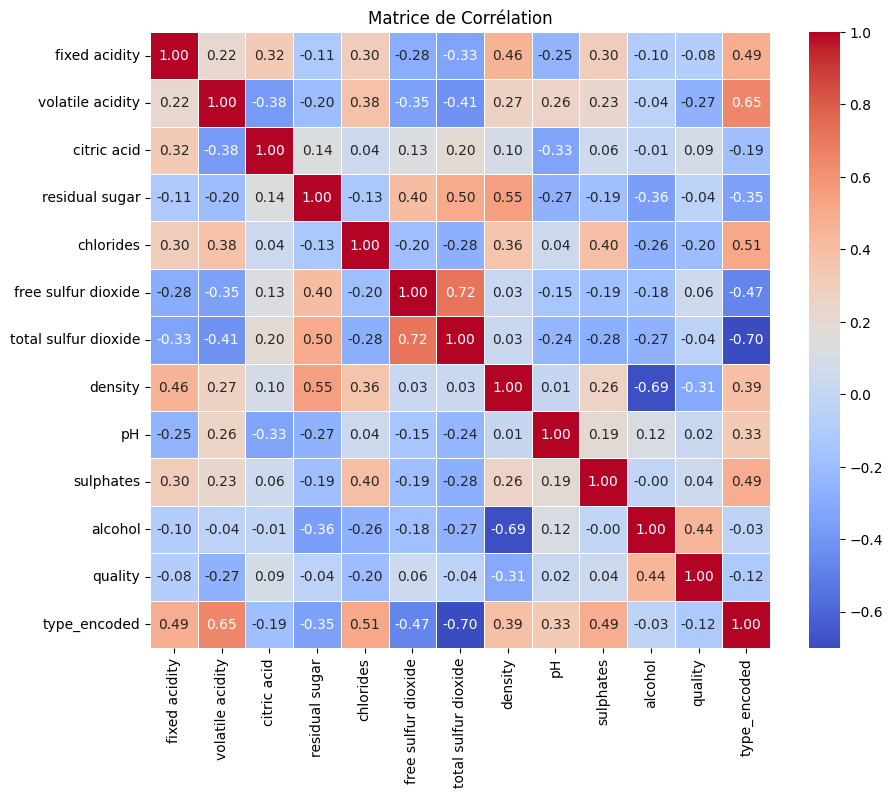

In [144]:
# Question 11

# Encodage de la colonne 'type' (red = 1, white = 0)
df_2['type_encoded'] = df_2['type'].map({'red': 1, 'white': 0})
numerical_df_2 = df_2.select_dtypes(include=['number'])

# Calcule la matrice de corrélation
correlation_matrix = numerical_df_2.corr()

# Affichage de la matrice de corrélation sous forme de carte thermique
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

Explication :

Ces coefficients vont de -1 à +1,
et leur valeur indique la force et la direction de la relation linéaire entre deux variables.

Très forte corrélation (±0.9 à ±1.0) :

Cela indique une relation très forte entre les deux variables. Si la corrélation est positive, les deux variables augmentent ensemble de manière quasi linéaire. Si elle est négative, l'augmentation d'une variable est liée à la diminution de l'autre.

Corrélation forte (±0.7 à ±0.9) :

Cela montre une relation claire entre les variables, bien que la relation ne soit pas aussi parfaite. Une corrélation positive signifie que les deux variables augmentent ensemble, et une corrélation négative signifie que l'augmentation d'une variable est liée à la diminution de l'autre.

Faible corrélation (±0.2 à ±0.4) :

La relation entre les variables est faible. Les variables peuvent être légèrement liées, mais la relation n'est pas clairement linéaire.
Très faible ou aucune corrélation (±0 à ±0.2) :

Il n'y a pratiquement aucune relation linéaire entre les variables. Si la corrélation est très proche de 0, cela signifie que les variables ne sont pas liées de manière linéaire.

Dans notre dataset, on constate que la "free sulfure dioxyde" est corrélée positivement liée à "free sulfure dioxyde". Pareillement, entre la densité et l'acidité fixée mais de manière inverse.
Ainsi lorsque la densité augmente, la valeur "residual sugar" augmente également mais pas de manière linéaire.
A l'inverse, lorsque la densité augmente, l'acidité fixée diminue.

La matrice de corrélation permet de mieux comprendre les relations entre les différentes variables de votre jeu de données. Si vous êtes intéressé par la prédiction d'une variable en fonction d'une autre, les variables fortement corrélées sont généralement plus intéressantes à utiliser dans les modèles statistiques ou d'apprentissage automatique.

4 Partie

In [159]:
# Question 1
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_standard = df_2.copy()

df_scaled_standard['type'] = df_scaled_standard['type'].map({'white': 0, 'red': 1})

df_scaled_standard[df_scaled_standard.columns] = scaler.fit_transform(df_scaled_standard)

print("Données normalisées avec StandardScaler :\n", df_scaled_standard)


Données normalisées avec StandardScaler :
           type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    -0.571367      -0.166089         -0.423183     0.284686        3.206929   
1    -0.571367      -0.706073         -0.240949     0.147046       -0.807837   
2    -0.571367       0.682458         -0.362438     0.559966        0.306208   
3    -0.571367      -0.011808         -0.666161     0.009406        0.642523   
4    -0.571367      -0.011808         -0.666161     0.009406        0.642523   
...        ...            ...               ...          ...             ...   
6492  1.750190      -0.783214          1.581387    -1.642273       -0.723758   
6493  1.750190      -1.014636          1.277665    -1.504633       -0.681719   
6494  1.750190      -0.706073          1.034686    -1.298173       -0.660699   
6495  1.750190      -1.014636          1.854738    -1.366993       -0.723758   
6496  1.750190      -0.937495         -0.180205     1.041706       -0.387443 

In [ ]:
# Question 2

from sklearn.preprocessing import MinMaxScaler

df_minmax = df_2.copy()

# Initialiser le MinMaxScaler (par défaut entre 0 et 1)
scaler = MinMaxScaler()

# Applique la normalisation à toutes les colonnes numériques, sauf 'type'
# Si 'type' est déjà numérique, on peut aussi l'inclure
df_minmax[df_minmax.columns.difference(['type'])] = scaler.fit_transform(df_minmax[df_minmax.columns.difference(['type'])])

# Affiche les données normalisées
print("Données normalisées avec MinMaxScaler :\n", df_minmax)

Données normalisées avec MinMaxScaler :
        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white       0.264463          0.126667     0.216867        0.308282   
1     white       0.206612          0.146667     0.204819        0.015337   
2     white       0.355372          0.133333     0.240964        0.096626   
3     white       0.280992          0.100000     0.192771        0.121166   
4     white       0.280992          0.100000     0.192771        0.121166   
...     ...            ...               ...          ...             ...   
6492    red       0.198347          0.346667     0.048193        0.021472   
6493    red       0.173554          0.313333     0.060241        0.024540   
6494    red       0.206612          0.286667     0.078313        0.026074   
6495    red       0.173554          0.376667     0.072289        0.021472   
6496    red       0.181818          0.153333     0.283133        0.046012   

      chlorides  free sulfur dioxi

In [155]:
# Avant normalisation
print("Données avant normalisation :\n", df_2.head(), "\n")

# Après normalisation
print("Données après normalisation :\n", df_minmax.head())

Données avant normalisation :
     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  type_encoded  
0       0.45      8.8        6  

La normalisation a pour but de redimensionner les valeurs des différentes caractéristiques (ou variables) dans une plage spécifique, souvent entre [0, 1] avec MinMaxScaler, ou une distribution centrée autour de 0 avec StandardScaler.
Cela permet de comparer les gammes à égalité en terme d'échelle.

On peut comparer entre le dataset prigin avec le dataset normalisé

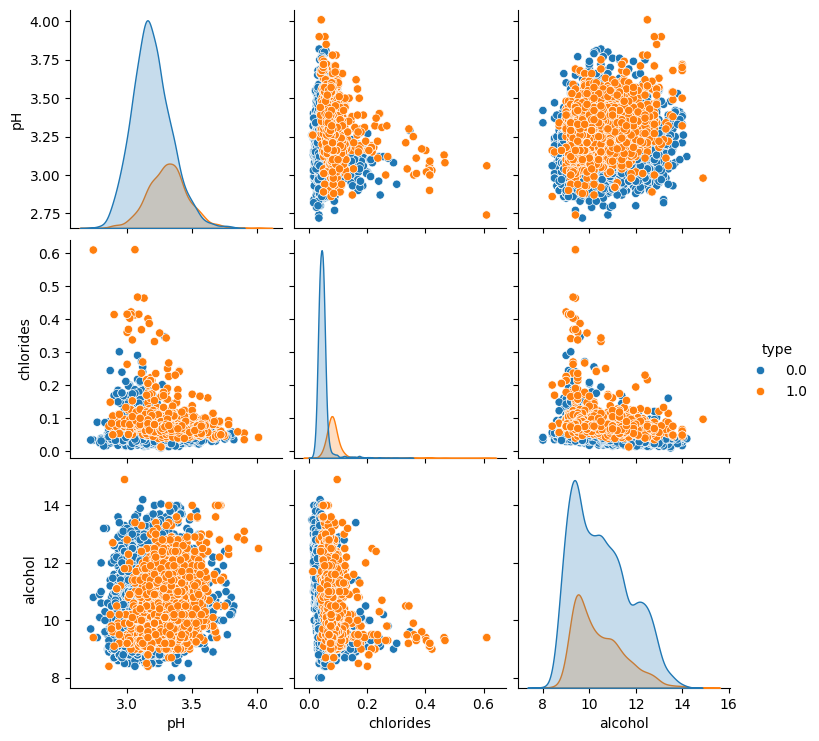

In [ ]:
sns.pairplot(df[['pH', 'chlorides', 'alcohol', 'type']], hue='type')


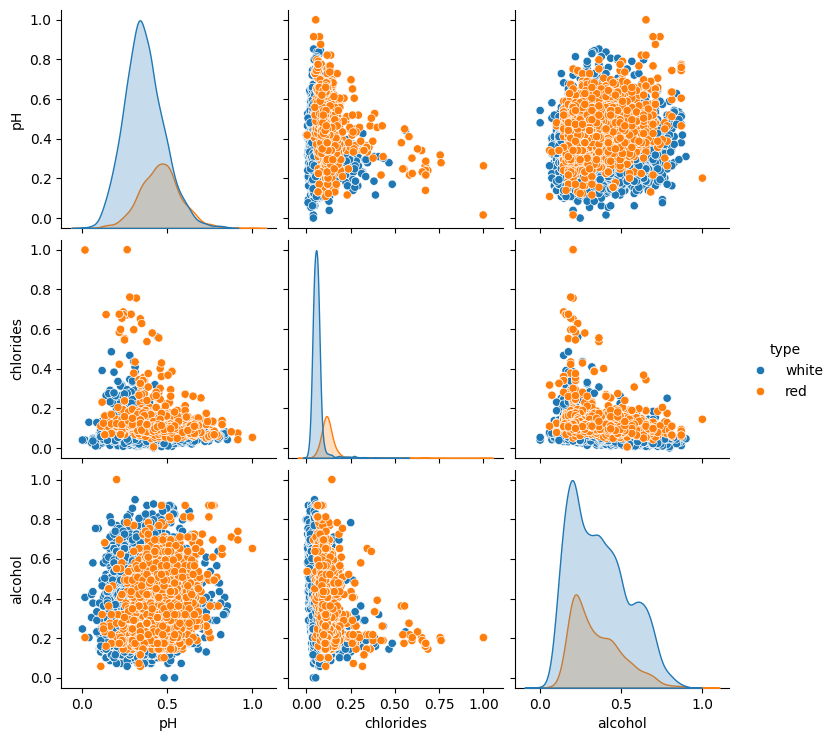

In [161]:
sns.pairplot(df_minmax[['pH', 'chlorides', 'alcohol', 'type']], hue='type')


Conclusion:

En prenant la normalisation avec MinMaxScaler, on va "écraser" les grandes valeurs et "dilater" les petites.